In [1]:
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

from pandas import Grouper
from pandas import Series
from statsmodels.tsa.stattools import adfuller

from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from math import sqrt
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import numpy as np
import warnings

import pandas as pd
import datetime
import matplotlib.pyplot as plt

Dataset 1134, Validation 300
             Volume
count  1.435000e+03
mean   8.413773e+07
std    5.465338e+07
min    1.065390e+07
25%    5.432725e+07
50%    7.200860e+07
75%    9.814905e+07
max    7.564316e+08


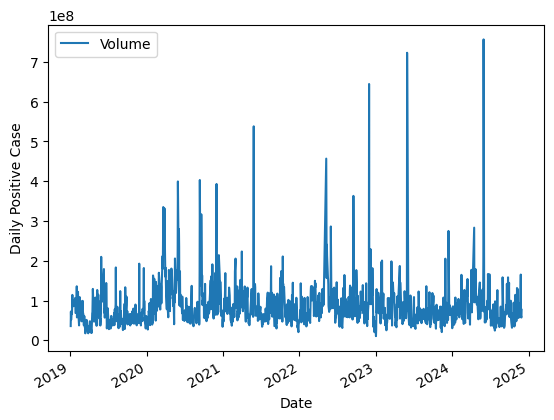

In [2]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('../../Dataset/BBCA_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - (300 + end)
dataset, validation = series[0:split_point], series[split_point:-end]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

print(series.describe())
series.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

                  1
count  1.134000e+03
mean   8.577689e+07
std    5.488637e+07
min    1.065390e+07
25%    5.502025e+07
50%    7.345465e+07
75%    1.006580e+08
max    7.228279e+08


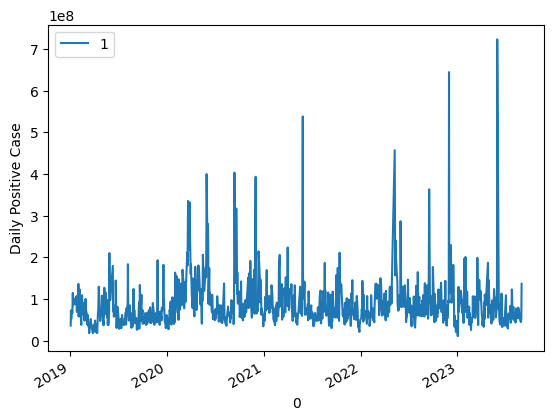

In [3]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
print(series.describe())
series.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

                  1
count  3.000000e+02
mean   7.796590e+07
std    5.349469e+07
min    2.082770e+07
25%    5.284495e+07
50%    6.669100e+07
75%    8.956852e+07
max    7.564316e+08


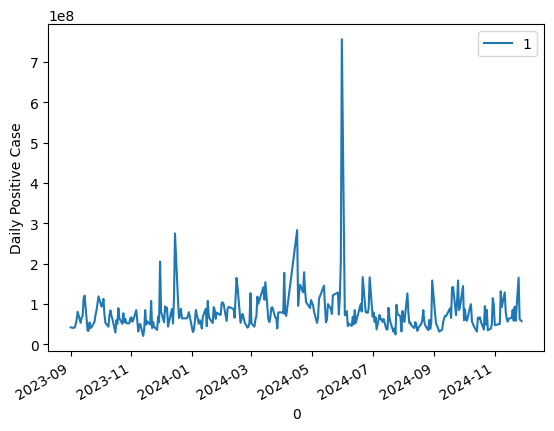

In [4]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
valid = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
print(valid.describe())
valid.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

C:\Users\akhda\AppData\Local\Temp\ipykernel_11212\2594613765.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


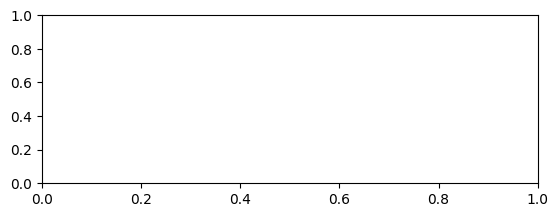

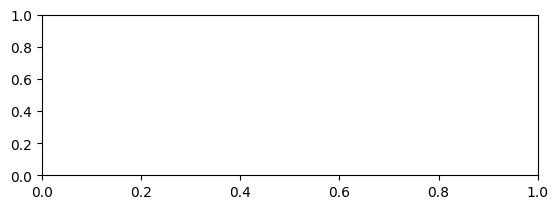

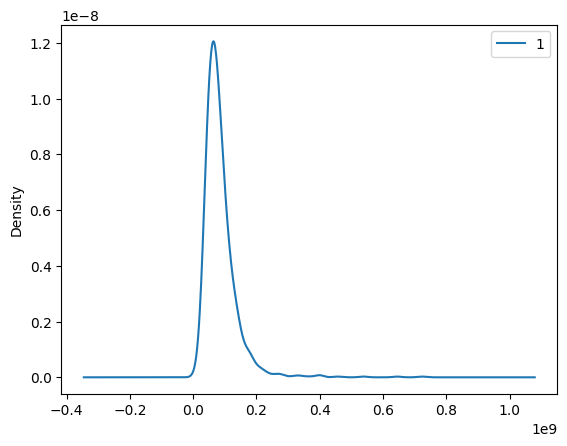

In [5]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

In [6]:
# grid search ARIMA parameters for time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    list_cfg = []
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        list_cfg.append([best_cfg,best_score])
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return list_cfg


In [7]:
# # grid search ARIMA parameters for time series
# # load dataset
# # series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# # evaluate parameters
# p_values = range(1, 5)
# d_values = [1]
# q_values = range(1, 5)
# warnings.filterwarnings("ignore")

# list_order = evaluate_models(series.values, p_values, d_values, q_values)

In [8]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 68522718.406


In [9]:
# tentukan model
# print(list_order)
# ARIMA_order = list_order[-1][0]
# print(ARIMA_order)
ARIMA_order = (1, 1, 1)
# print(ARIMA_order)

In [10]:
# evaluate grid search configured ARIMA model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 56397389.258


                  0
count  5.670000e+02
mean  -5.241241e+05
std    5.644475e+07
min   -1.794487e+08
25%   -2.469268e+07
50%   -7.675656e+06
75%    1.320781e+07
max    6.369411e+08


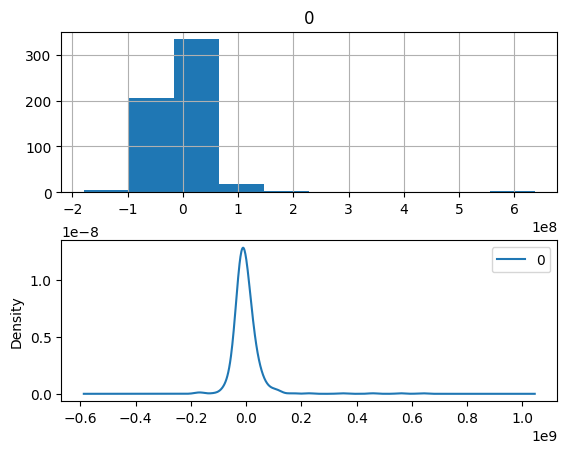

In [11]:
# summarize ARIMA forecast residuals

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

-524124.09375


RMSE: 56394953.758
                  0
count  5.670000e+02
mean   5.079365e-01
std    5.644475e+07
min   -1.789246e+08
25%   -2.416855e+07
50%   -7.151528e+06
75%    1.373193e+07
max    6.374652e+08


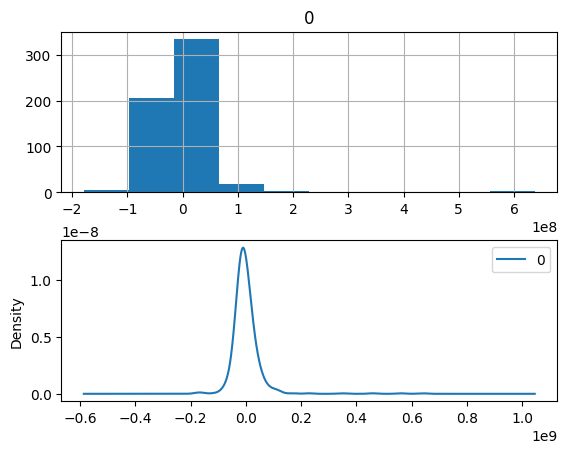

In [13]:
# plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 56394953.758
                  0
count  5.670000e+02
mean   5.079365e-01
std    5.644475e+07
min   -1.789246e+08
25%   -2.416855e+07
50%   -7.151528e+06
75%    1.373193e+07
max    6.374652e+08


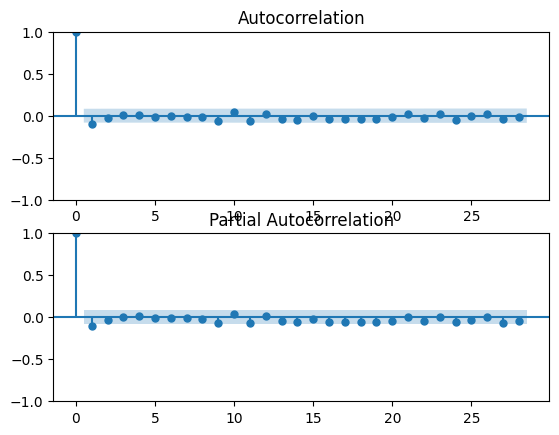

In [14]:
# ACF and PACF plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca(),method='ywm')
pyplot.show()

In [15]:
# save finalized model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

# load finalized model and make a prediction

In [16]:
# load finalized model and make a prediction

# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
print('Predicted: %.3f' % yhat)

Predicted: 87855862.305


# try on evaluation data

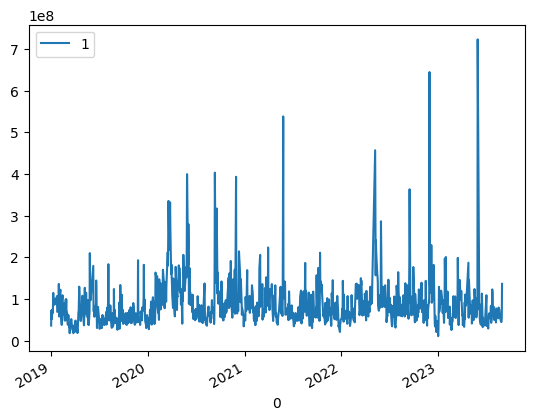

,1
0,
2019-01-02,35956000
2019-01-03,72358000
2019-01-04,51465000
2019-01-07,73438000
2019-01-08,66247500
...,...
2023-08-25,50379000
2023-08-28,44423100
2023-08-29,45428500


In [17]:
series.plot()
pyplot.show()
series

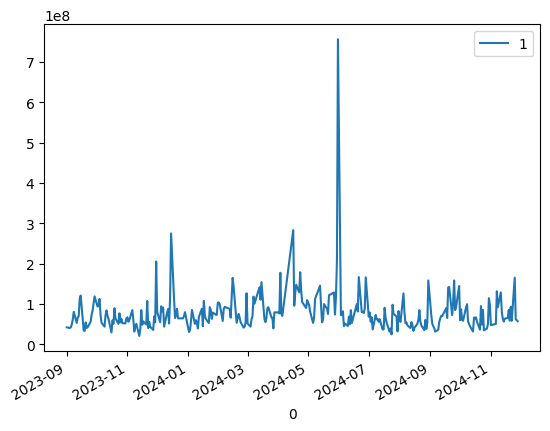

,1
0,
2023-09-01,42152700
2023-09-04,40610600
2023-09-05,42007200
2023-09-06,49318400
2023-09-07,61405200
...,...
2024-11-21,93181200
2024-11-22,58396100
2024-11-25,165369400


In [18]:
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
validation.squeeze('columns') 
validation.plot()
pyplot.show()
validation

>Predicted=87855862.305, Expected=42152700.000
>Predicted=57647045.008, Expected=40610600.000
>Predicted=55783677.779, Expected=42007200.000
>Predicted=55010228.628, Expected=49318400.000
>Predicted=56552945.649, Expected=61405200.000
>Predicted=60295705.441, Expected=80732304.000
>Predicted=67345703.057, Expected=53155900.000
>Predicted=58408405.919, Expected=66479000.000
>Predicted=62758264.559, Expected=69490200.000
>Predicted=64107794.598, Expected=112757904.000
>Predicted=80162978.616, Expected=121005296.000
>Predicted=85769200.836, Expected=34272200.000
>Predicted=57136978.731, Expected=33325800.000
>Predicted=54891952.934, Expected=54305500.000
>Predicted=60727918.476, Expected=40607000.000
>Predicted=55212670.543, Expected=42445300.000
>Predicted=54671402.893, Expected=56132200.000
>Predicted=58614737.467, Expected=73544704.000
>Predicted=64688686.861, Expected=84345000.000
>Predicted=69271983.345, Expected=118960000.000
>Predicted=82999503.219, Expected=93663000.000
>Predicted

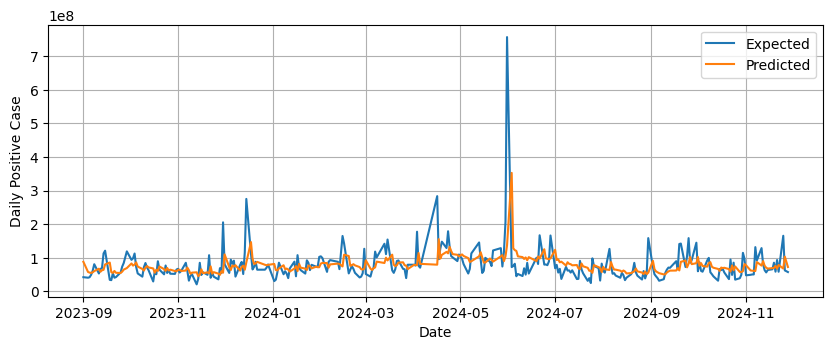

In [19]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions) *100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

In [20]:
validation

,1
0,
2023-09-01,42152700
2023-09-04,40610600
2023-09-05,42007200
2023-09-06,49318400
2023-09-07,61405200
...,...
2024-11-21,93181200
2024-11-22,58396100
2024-11-25,165369400


In [21]:
y[:,0].shape

(300,)

In [22]:
predictions_flat.shape

(300,)

>Predicted=136107200.000, Expected=42152700
>Predicted=42152700.000, Expected=40610600
>Predicted=40610600.000, Expected=42007200
>Predicted=42007200.000, Expected=49318400
>Predicted=49318400.000, Expected=61405200
>Predicted=61405200.000, Expected=80732304
>Predicted=80732304.000, Expected=53155900
>Predicted=53155900.000, Expected=66479000
>Predicted=66479000.000, Expected=69490200
>Predicted=69490200.000, Expected=112757904
>Predicted=112757904.000, Expected=121005296
>Predicted=121005296.000, Expected=34272200
>Predicted=34272200.000, Expected=33325800
>Predicted=33325800.000, Expected=54305500
>Predicted=54305500.000, Expected=40607000
>Predicted=40607000.000, Expected=42445300
>Predicted=42445300.000, Expected=56132200
>Predicted=56132200.000, Expected=73544704
>Predicted=73544704.000, Expected=84345000
>Predicted=84345000.000, Expected=118960000
>Predicted=118960000.000, Expected=93663000
>Predicted=93663000.000, Expected=98380200
>Predicted=98380200.000, Expected=112582800
>Pr

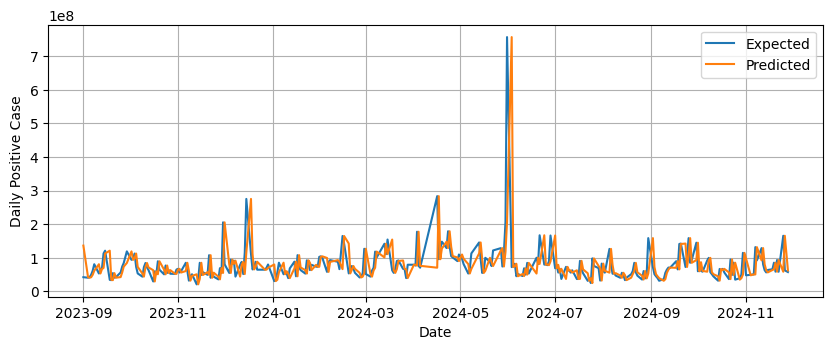

In [23]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

# try on test data

                  0
count  7.180000e+02
mean  -2.845374e+05
std    5.615204e+07
min   -2.807252e+08
25%   -2.383635e+07
50%   -8.529046e+06
75%    1.333977e+07
max    6.369411e+08


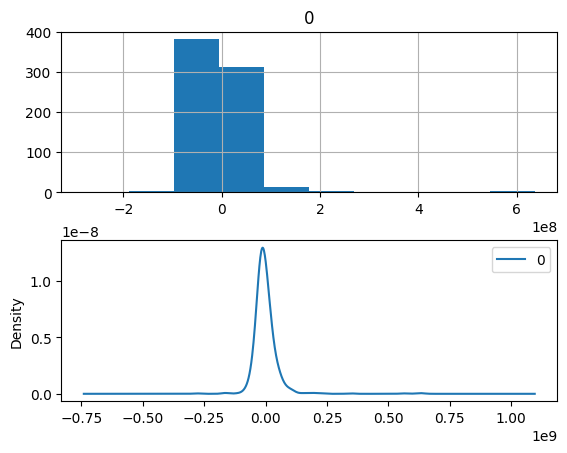

-284537.4375


In [24]:
# find new residual on new training data

# load data
series = read_csv('../../Dataset/BBCA_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

In [25]:
# save finalized model

# load data
series = read_csv('../../Dataset/BBCA_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 300 # sesuaikan dengan split point di awal code
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
history = [x for x in X]

# difference data
# fit model
model = ARIMA(history, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=57886631.665, Expected=40610600.000
>Predicted=56023264.435, Expected=42007200.000
>Predicted=55249815.285, Expected=49318400.000
>Predicted=56792532.305, Expected=61405200.000
>Predicted=60535292.097, Expected=80732304.000
>Predicted=67585289.714, Expected=53155900.000
>Predicted=58647992.576, Expected=66479000.000
>Predicted=62997851.215, Expected=69490200.000
>Predicted=64347381.254, Expected=112757904.000
>Predicted=80402565.273, Expected=121005296.000
>Predicted=86008787.492, Expected=34272200.000
>Predicted=57376565.387, Expected=33325800.000
>Predicted=55131539.590, Expected=54305500.000
>Predicted=60967505.133, Expected=40607000.000
>Predicted=55452257.199, Expected=42445300.000
>Predicted=54910989.550, Expected=56132200.000
>Predicted=58854324.123, Expected=73544704.000
>Predicted=64928273.517, Expected=84345000.000
>Predicted=69511570.001, Expected=118960000.000
>Predicted=83239089.875, Expected=93663000.000
>Predicted=76853806.970, Expected=98380200.000
>Predicted

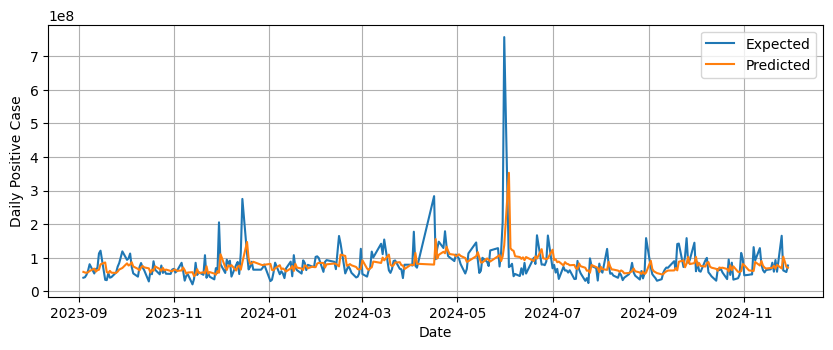

In [26]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100 
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: 'Date'})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

>Predicted=42152700.000, Expected=40610600
>Predicted=40610600.000, Expected=42007200
>Predicted=42007200.000, Expected=49318400
>Predicted=49318400.000, Expected=61405200
>Predicted=61405200.000, Expected=80732304
>Predicted=80732304.000, Expected=53155900
>Predicted=53155900.000, Expected=66479000
>Predicted=66479000.000, Expected=69490200
>Predicted=69490200.000, Expected=112757904
>Predicted=112757904.000, Expected=121005296
>Predicted=121005296.000, Expected=34272200
>Predicted=34272200.000, Expected=33325800
>Predicted=33325800.000, Expected=54305500
>Predicted=54305500.000, Expected=40607000
>Predicted=40607000.000, Expected=42445300
>Predicted=42445300.000, Expected=56132200
>Predicted=56132200.000, Expected=73544704
>Predicted=73544704.000, Expected=84345000
>Predicted=84345000.000, Expected=118960000
>Predicted=118960000.000, Expected=93663000
>Predicted=93663000.000, Expected=98380200
>Predicted=98380200.000, Expected=112582800
>Predicted=112582800.000, Expected=72855696
>Pr

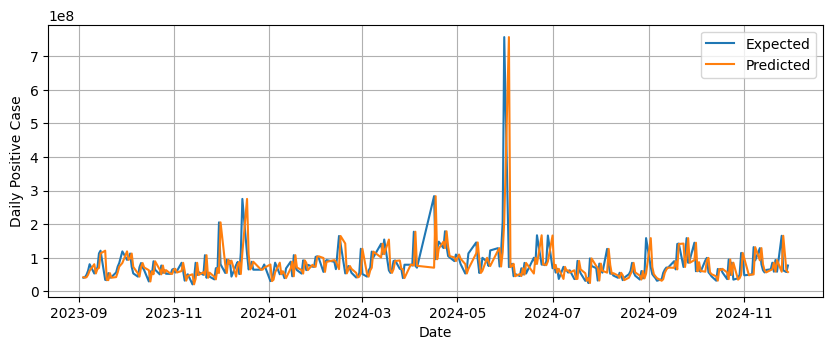

In [27]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "Date"})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()